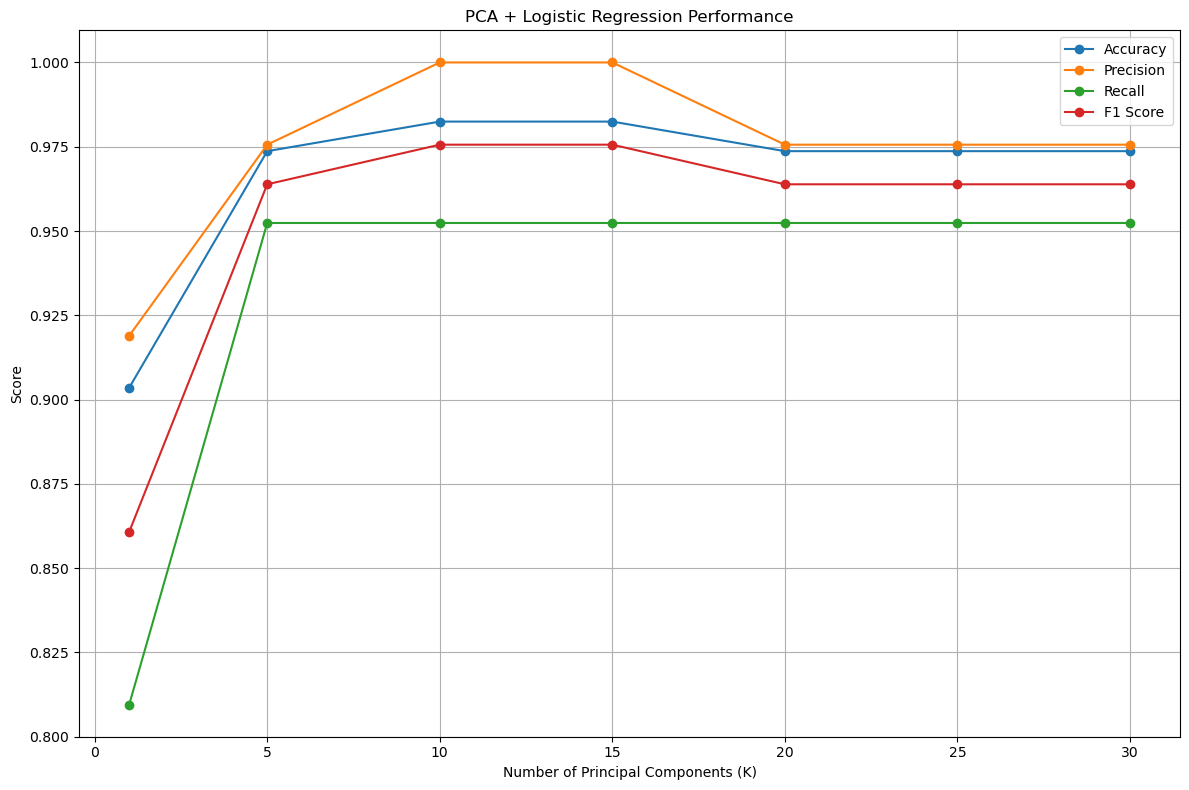

Best K: 10 components
Best Accuracy: 0.9825


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load and prepare data
df = pd.read_csv('../Datasets/cancer.csv')
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df = df.loc[:, ~df.columns.str.contains('^id|Unnamed', case=False)]

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Scale and split
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Evaluate logistic regression with different numbers of PCA components
k_values = [1, 5, 10, 15, 20, 25, 30]
accuracies, precisions, recalls, f1_scores = [], [], [], []

for k in k_values:
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Plot all metrics
plt.figure(figsize=(12, 8))
plt.plot(k_values, accuracies, marker='o', label="Accuracy")
plt.plot(k_values, precisions, marker='o', label="Precision")
plt.plot(k_values, recalls, marker='o', label="Recall")
plt.plot(k_values, f1_scores, marker='o', label="F1 Score")
plt.xlabel("Number of Principal Components (K)")
plt.ylabel("Score")
plt.title("PCA + Logistic Regression Performance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Show best result
best_k = k_values[np.argmax(accuracies)]
print(f"Best K: {best_k} components")
print(f"Best Accuracy: {max(accuracies):.4f}")
